# Описание датасета Wine Quality

Здесь полная версия, на kaggle только красное вино

Датасет "Wine Quality" состоит из данных о химических свойствах красных и белых вин "Vinho Verde" из Португалии. Цель - предсказать качество вина (оценка от 0 до 10) на основе химических анализов. Данные можно использовать как для задач классификации, так и для регрессии.

Характеристики данных:

11 входных признаков (химические свойства, например, кислотность, содержание сахара и т.д.).

1 целевой признак (качество).

Два типа вин: красное и белое.







0 - fixed acidity -       фиксированная кислотность (не испаряются)

1 - volatile acidity -    летучая кислотность

2 - citric acid -         лимонная кислота
   
3 - residual sugar -      остаточный сахар

4 - chlorides -           хлориды

5 - free sulfur dioxide - свободный диоксид серы

6 - total sulfur dioxide -общий диоксид серы

7 - density -             плотность

8 - pH -                  кислотно-щелочной баланс

9 - sulphates -           сульфаты

10 - alcohol -            этиловый спирт

11 - quality (от 0 до 10) - качество (target)

12 - color -               красное или белое


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt


class WineDataset:
    def __init__(self, url):
        """
        Инициализация даталоудера: загружает данные вина.
        """
        self.url = url
        self.data = self._load_data()

    def _load_data(self):
        """Загружает данные."""
        data = pd.read_csv(self.url, sep=";")

        # Создаем колонку 'quality_label', где 1, если качество >= 7, и 0, если качество < 7
        data['quality_label'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)
        return data

    def get_sample(self, n=5):
        """Возвращает случайный фрагмент данных в виде таблицы."""
        sample = self.data.sample(n)
        return tabulate(sample, headers="keys", tablefmt="fancy_grid")

    def get_range(self, start, end):
        """Возвращает фрагмент данных в заданном диапазоне индексов."""
        if start < 0 or end > len(self.data):
            raise ValueError("Индексы выходят за пределы данных.")
        range_data = self.data.iloc[start:end]
        return tabulate(range_data, headers="keys", tablefmt="fancy_grid")

    def split_data(self, test_size=0.2):
        """Разбивает данные на обучающую и тестовую выборки."""
        # Убираем только столбец 'quality' (target), но оставляем 'color'
        X = self.data.drop(['quality', 'quality_label'], axis=1)
        y = self.data['quality_label']
        return train_test_split(X, y, test_size=test_size, random_state=42)

    def get_statistics(self):
        """Возвращает основные статистики датасета."""
        stats = {
            "Общее количество строк": len(self.data),
            "Количество признаков": len(self.data.columns),
            "Пропуски в данных": self.data.isnull().sum().to_dict(),
        }
        return stats

    def plot_class_distribution(self):
        """
        Визуализирует распределение классов (оценок качества).
        """
        sns.countplot(data=self.data, x='quality')
        plt.ylabel('Количество')
        plt.title('Распределение оценок качества вин')
        plt.xlabel('Оценка качества')
        plt.show()

    def plot_correlation_matrix(self):
        """Визуализирует корреляционную матрицу признаков."""
        plt.figure(figsize=(10, 8))
        # Учитываем только числовые столбцы
        numeric_data = self.data.select_dtypes(include=['float64', 'int64'])
        correlation_matrix = numeric_data.corr()
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title('Корреляционная матрица')
        plt.show()


In [67]:
# URLs для загрузки данных
red_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Создаем объект даталоудера
red_dataset = WineDataset(red_url)
white_dataset = WineDataset(white_url)

# Пример использования
print("Пример случайной выборки данных красного вина:")
print(red_dataset.get_sample())

print("\nПример данных белого вина из диапазона индексов 10-15:")
print(white_dataset.get_range(10, 15))


Пример случайной выборки данных красного вина:
╒══════╤═════════════════╤════════════════════╤═══════════════╤══════════════════╤═════════════╤═══════════════════════╤════════════════════════╤═══════════╤══════╤═════════════╤═══════════╤═══════════╤═════════════════╕
│      │   fixed acidity │   volatile acidity │   citric acid │   residual sugar │   chlorides │   free sulfur dioxide │   total sulfur dioxide │   density │   pH │   sulphates │   alcohol │   quality │   quality_label │
╞══════╪═════════════════╪════════════════════╪═══════════════╪══════════════════╪═════════════╪═══════════════════════╪════════════════════════╪═══════════╪══════╪═════════════╪═══════════╪═══════════╪═════════════════╡
│ 1502 │             7.3 │              0.585 │          0.18 │              2.4 │       0.078 │                    15 │                     60 │   0.99638 │ 3.31 │        0.54 │       9.8 │         5 │               0 │
├──────┼─────────────────┼────────────────────┼───────────────┼──────

# Статистика

In [68]:
print("\nСтатистика по данным:")
print()
print("Красное вино")
for key, value in red_dataset.get_statistics().items():
    print(f"{key}: {value}")

print()
print("Белое вино")
for key, value in white_dataset.get_statistics().items():
    print(f"{key}: {value}")


Статистика по данным:

Красное вино
Общее количество строк: 1599
Количество признаков: 13
Пропуски в данных: {'fixed acidity': 0, 'volatile acidity': 0, 'citric acid': 0, 'residual sugar': 0, 'chlorides': 0, 'free sulfur dioxide': 0, 'total sulfur dioxide': 0, 'density': 0, 'pH': 0, 'sulphates': 0, 'alcohol': 0, 'quality': 0, 'quality_label': 0}

Белое вино
Общее количество строк: 4898
Количество признаков: 13
Пропуски в данных: {'fixed acidity': 0, 'volatile acidity': 0, 'citric acid': 0, 'residual sugar': 0, 'chlorides': 0, 'free sulfur dioxide': 0, 'total sulfur dioxide': 0, 'density': 0, 'pH': 0, 'sulphates': 0, 'alcohol': 0, 'quality': 0, 'quality_label': 0}



Распределение классов:

Красное вино


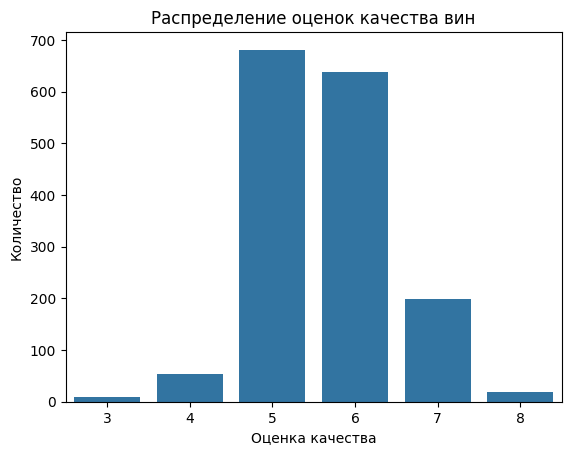

Белое вино


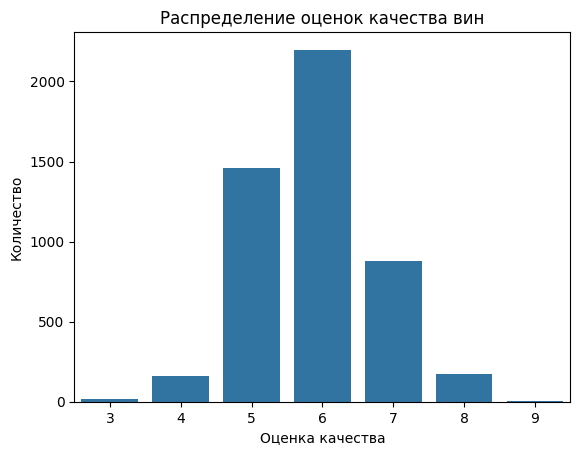

In [69]:

# Визуализация распределения классов
print("\nРаспределение классов:")
print()
print("Красное вино")
red_dataset.plot_class_distribution()
print("Белое вино")
white_dataset.plot_class_distribution()


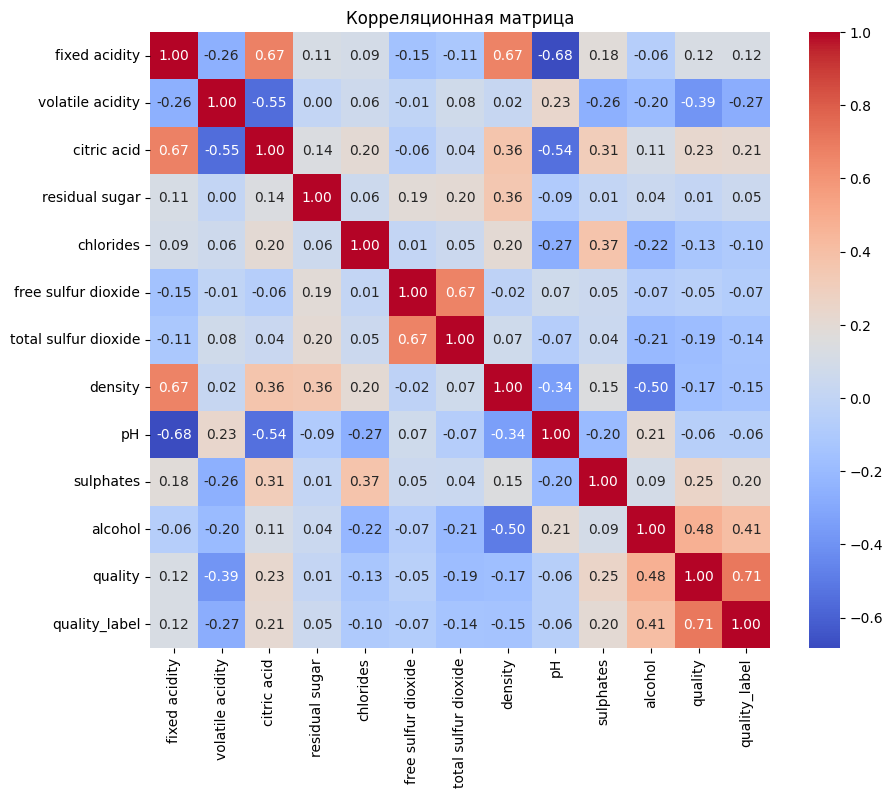

In [71]:
# Визуализация корреляционной матрицы
red_dataset.plot_correlation_matrix()


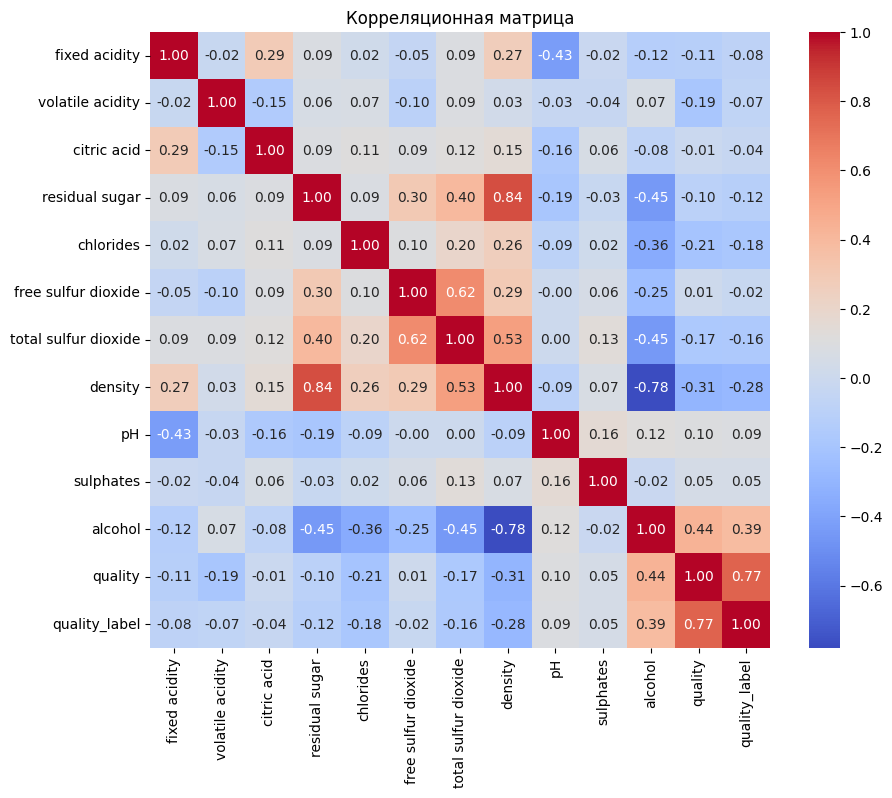

In [72]:
white_dataset.plot_correlation_matrix()

total sulfur dioxide и free sulfur dioxide: высокая корреляция

Это высокая положительная корреляция. Она говорит о том, что с увеличением общего содержания сернистого ангидрида (total sulfur dioxide) обычно увеличивается и его свободная часть (free sulfur dioxide). Это логично, так как свободная часть является частью общего содержания. Такое поведение может влиять на качество вина, поскольку эти вещества используются как консерванты.

density и alcohol: отрицательная корреляция

Это значительная отрицательная корреляция. Она говорит о том, что с увеличением содержания алкоголя плотность вина уменьшается. Это ожидаемо, так как спирт имеет меньшую плотность, чем вода, и большее содержание алкоголя уменьшает общую плотность жидкости. Этот показатель часто используется для анализа крепости вина и его текстуры.

сахар и плотность:  -  сахар повышает плотность

алкоголь и качество

Так как модель будет нелинейная, ничего выкидывать не будем

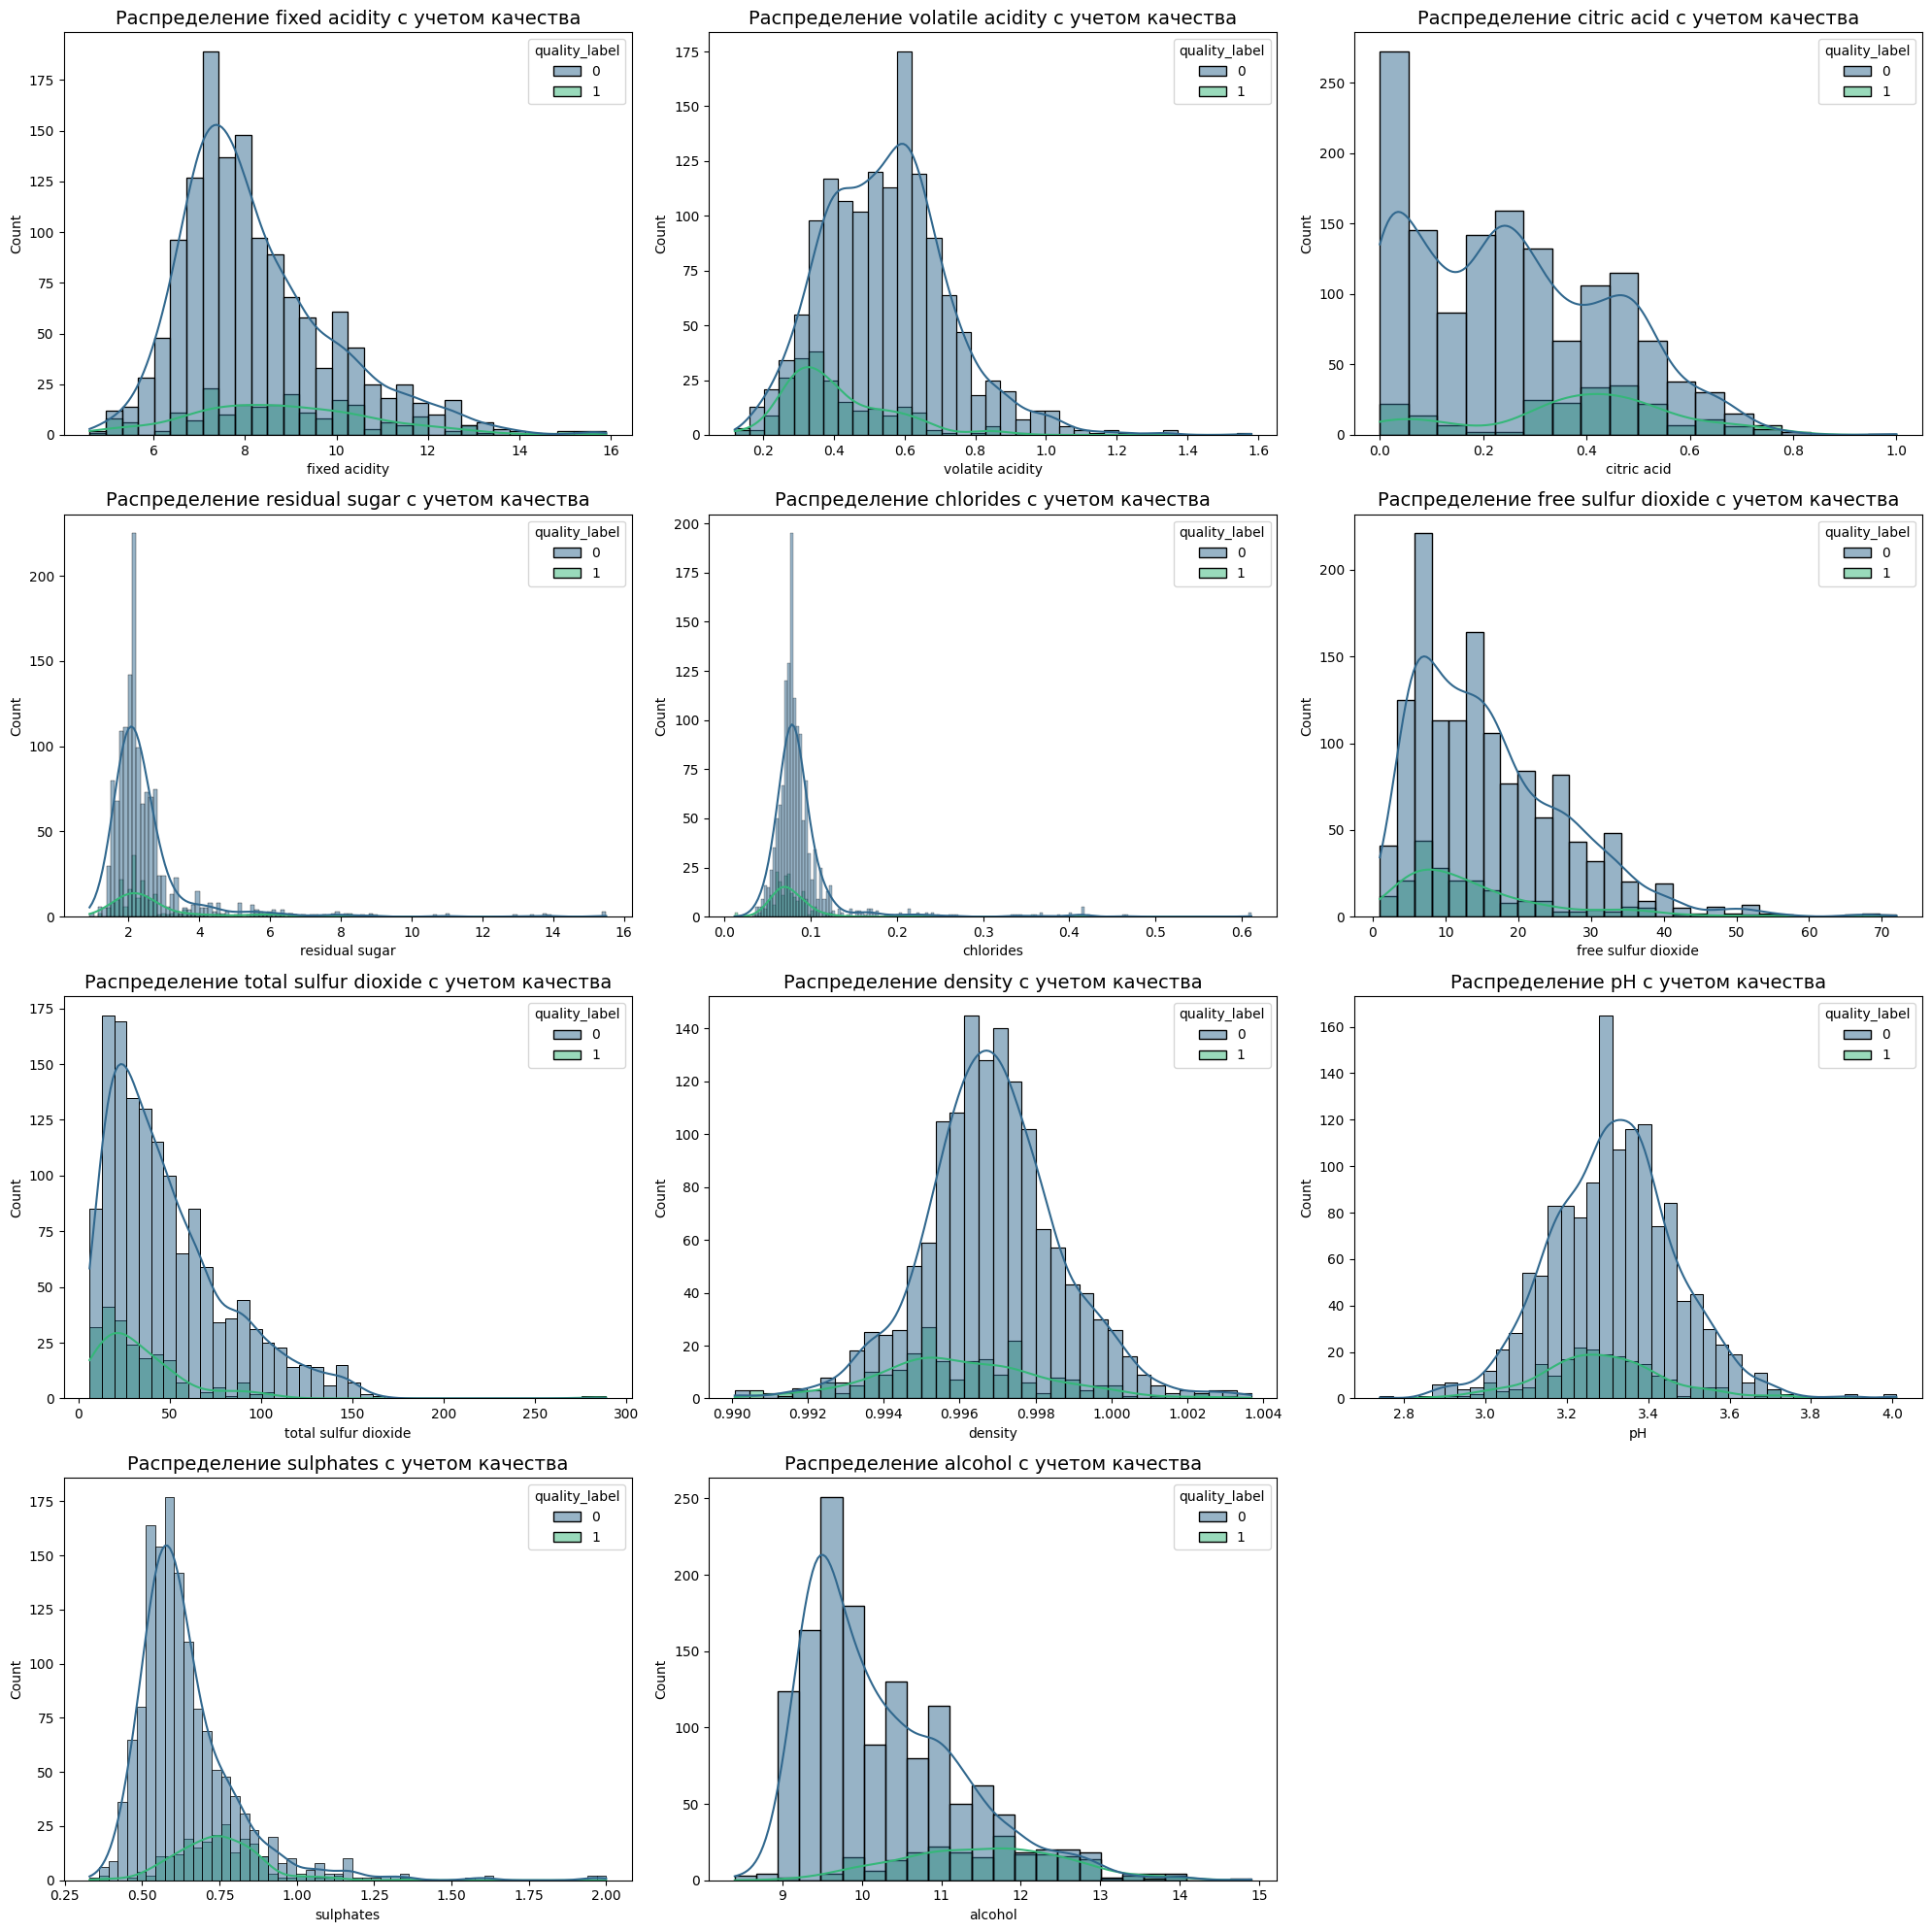

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем сетку графиков
fig, ax = plt.subplots(4, 3, figsize=(20, 20))  # 4 строки, 3 столбца для всех 12 признаков
ax = ax.flatten()

# Список колонок, исключая 'quality' и 'color'
columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

# Построение графиков
for i, col in enumerate(columns):
    if col != 'quality':  # Исключаем целевую переменную
        sns.histplot(data=red_dataset.data, x=col, hue='quality_label', kde=True, ax=ax[i], palette='viridis')
        ax[i].set_title(f'Распределение {col} с учетом качества', fontsize=14)

# Убираем лишние графики (если они есть)
for j in range(len(columns), len(ax)):
    fig.delaxes(ax[j])

# Улучшаем компоновку
plt.tight_layout()
plt.show()


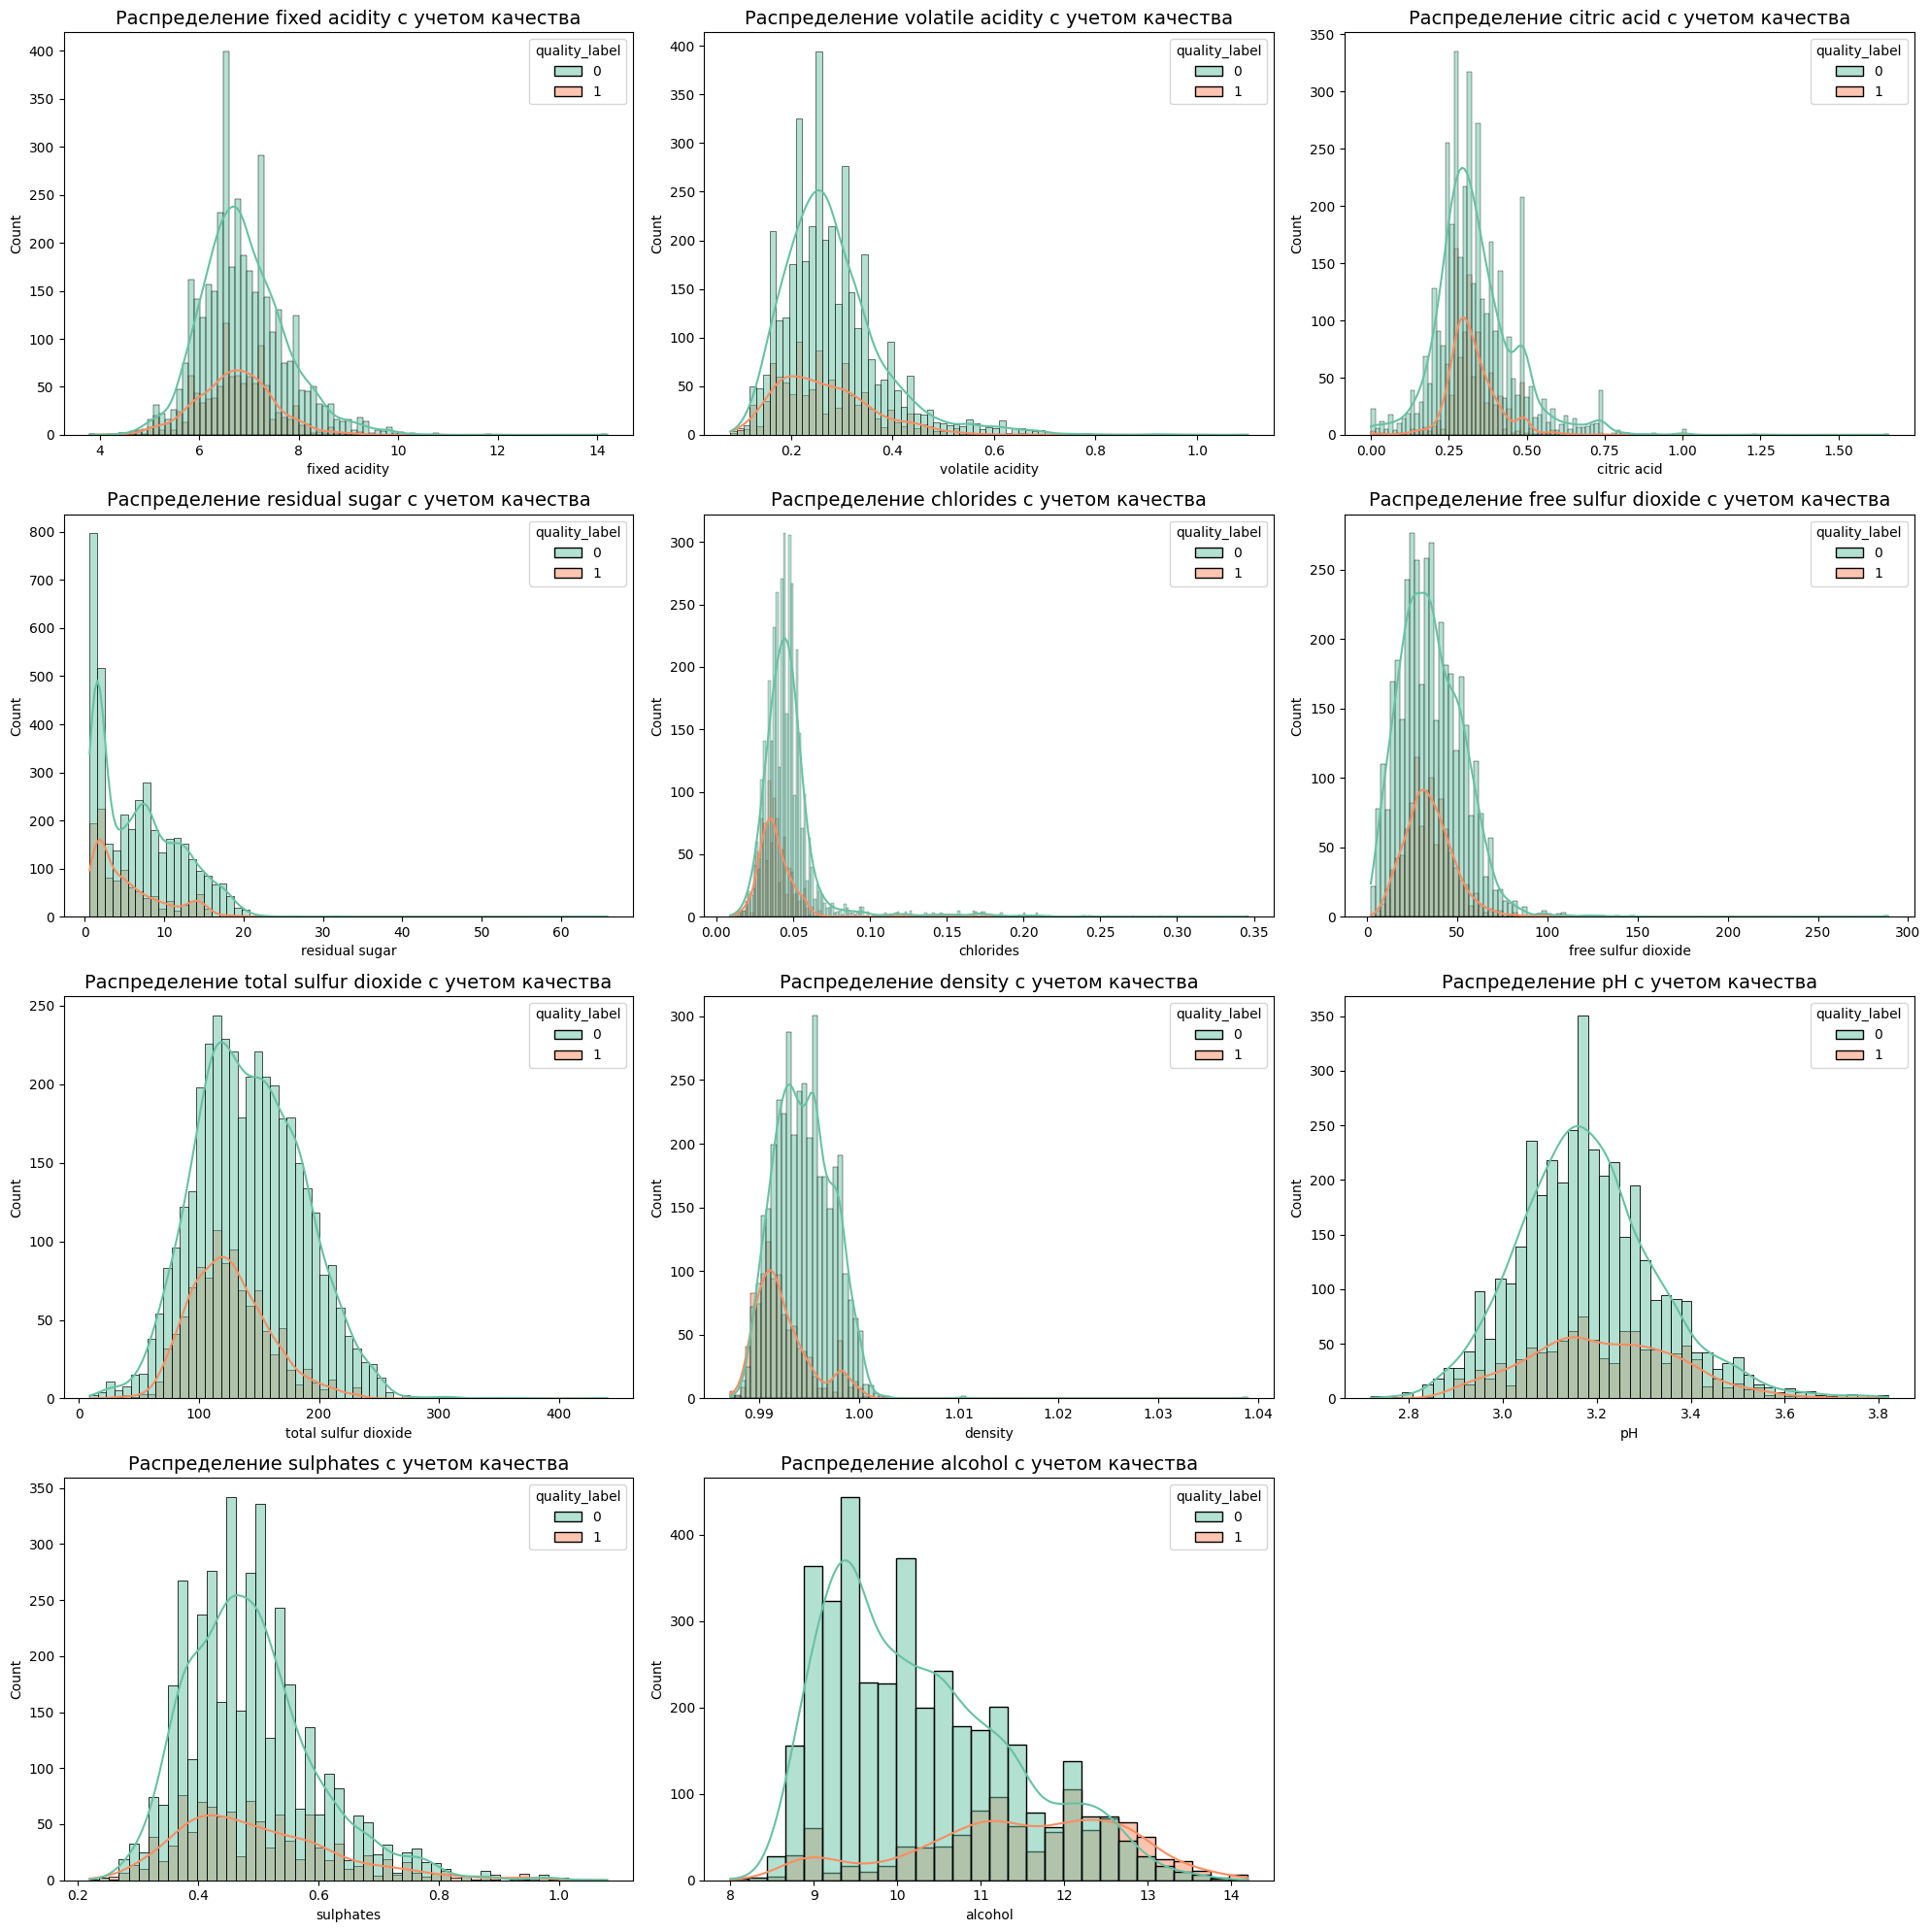

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем сетку графиков
fig, ax = plt.subplots(4, 3, figsize=(20, 20))  # 4 строки, 3 столбца для всех 12 признаков
ax = ax.flatten()

# Список колонок, исключая 'quality' и 'color'
columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

# Построение графиков
for i, col in enumerate(columns):
    if col != 'quality':  # Исключаем целевую переменную
        sns.histplot(data=white_dataset.data, x=col, hue='quality_label', kde=True, ax=ax[i], palette='Set2')
        ax[i].set_title(f'Распределение {col} с учетом качества', fontsize=14)

# Убираем лишние графики (если они есть)
for j in range(len(columns), len(ax)):
    fig.delaxes(ax[j])

# Улучшаем компоновку
plt.tight_layout()
plt.show()


# Обучение алгоритма

Здесь предсказание качества вина, quality >= 7 - отличное, остальное не очень. Метка хорошего 1, плохого 0. Алгоритм Random Forest показал наилучшие результаты в найденных ноутбуках

In [77]:
# Разбиение данных
X_train_r, X_test_r, y_train_r, y_test_r = red_dataset.split_data()
print(f"\nРазмер обучающей выборки красного: {X_train_r.shape}")
print(f"Размер тестовой выборки красного: {X_test_r.shape}")

X_train_w, X_test_w, y_train_w, y_test_w = white_dataset.split_data()
print(f"\nРазмер обучающей выборки красного: {X_train_w.shape}")
print(f"Размер тестовой выборки красного: {X_test_w.shape}")


Размер обучающей выборки красного: (1279, 11)
Размер тестовой выборки красного: (320, 11)

Размер обучающей выборки красного: (3918, 11)
Размер тестовой выборки красного: (980, 11)


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

r_classifier = RandomForestClassifier(n_estimators=500, random_state=123)
r_classifier.fit(X_train_r, y_train_r)

# Прогнозирование на тестовом наборе
y_pred_r = r_classifier.predict(X_test_r)

# Создание матрицы путаницы
cm = confusion_matrix(y_test_r, y_pred_r)

# Печать матрицы путаницы
print("Confusion Matrix:")
print(cm)

# Вычисление F1-Score
f1 = f1_score(y_test_r, y_pred_r, average='weighted')  # 'weighted' учитывает дисбаланс классов
print(f"F1-Score: {f1:.4f}")

Confusion Matrix:
[[264   9]
 [ 23  24]]
F1-Score: 0.8925


белое вино

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

w_classifier = RandomForestClassifier(n_estimators=500, random_state=123)
w_classifier.fit(X_train_w, y_train_w)

# Прогнозирование на тестовом наборе
y_pred_w = w_classifier.predict(X_test_w)

# Создание матрицы путаницы
cm = confusion_matrix(y_test_w, y_pred_w)

# Печать матрицы путаницы
print("Confusion Matrix:")
print(cm)

# Вычисление F1-Score
f1 = f1_score(y_test_w, y_pred_w, average='weighted')  # 'weighted' учитывает дисбаланс классов
print(f"F1-Score: {f1:.4f}")

Confusion Matrix:
[[722  31]
 [ 82 145]]
F1-Score: 0.8793


типа инференс...

In [81]:
import pandas as pd
from tabulate import tabulate

# Прогнозирование на тестовом наборе
y_pred_test = r_classifier.predict(X_test_r)

# Получаем настоящие метки из тестового набора
y_true_test = y_test_r

# Создаем DataFrame для сравнения предсказанных и истинных меток
comparison_df = pd.DataFrame({
    'Истинные метки': y_true_test,
    'Предсказанные метки': y_pred_test
})

# Случайно выбираем 10 записей из DataFrame
random_comparison = comparison_df.sample(n=10, random_state=123)

# Используем tabulate для красивого вывода таблицы
print("Сравнение случайных 10 истинных и предсказанных меток:")
print(tabulate(random_comparison, headers='keys', tablefmt='fancy_grid', showindex=False))


Сравнение случайных 10 истинных и предсказанных меток:
╒══════════════════╤═══════════════════════╕
│   Истинные метки │   Предсказанные метки │
╞══════════════════╪═══════════════════════╡
│                0 │                     0 │
├──────────────────┼───────────────────────┤
│                0 │                     0 │
├──────────────────┼───────────────────────┤
│                0 │                     0 │
├──────────────────┼───────────────────────┤
│                0 │                     0 │
├──────────────────┼───────────────────────┤
│                0 │                     0 │
├──────────────────┼───────────────────────┤
│                0 │                     0 │
├──────────────────┼───────────────────────┤
│                1 │                     0 │
├──────────────────┼───────────────────────┤
│                0 │                     0 │
├──────────────────┼───────────────────────┤
│                0 │                     0 │
├──────────────────┼───────────────────────┤


# PCA и кластеризация

красное

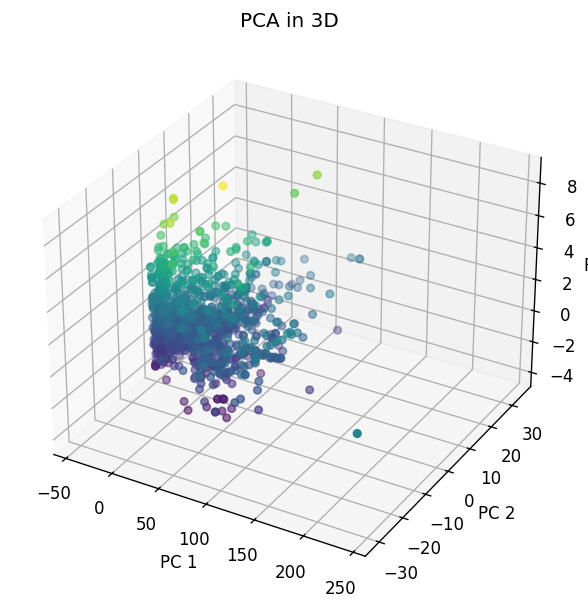

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result_r = pca.fit_transform(X_train_r)

fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(projection='3d')

ax.scatter(pca_result_r[:, 0], pca_result_r[:, 1], pca_result_r[:, 2], c=pca_result_r[:, 2], cmap='viridis')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('PCA in 3D')

plt.show()


белое

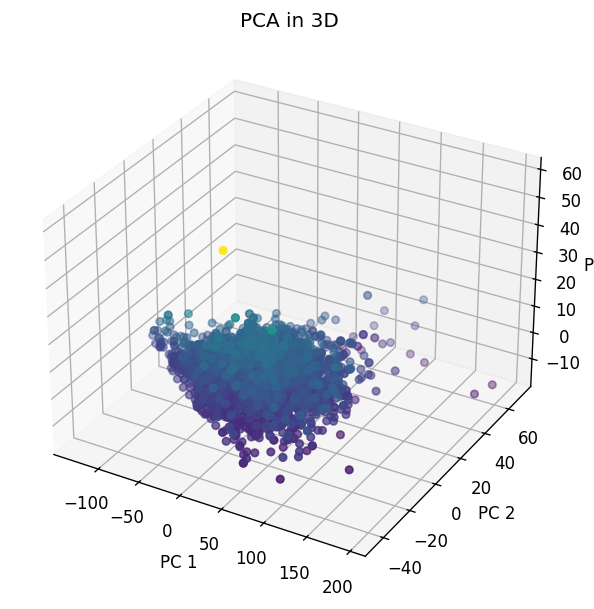

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result_w = pca.fit_transform(X_train_w)

fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(projection='3d')

ax.scatter(pca_result_w[:, 0], pca_result_w[:, 1], pca_result_w[:, 2], c=pca_result_w[:, 2], cmap='viridis')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('PCA in 3D')

plt.show()


k-means

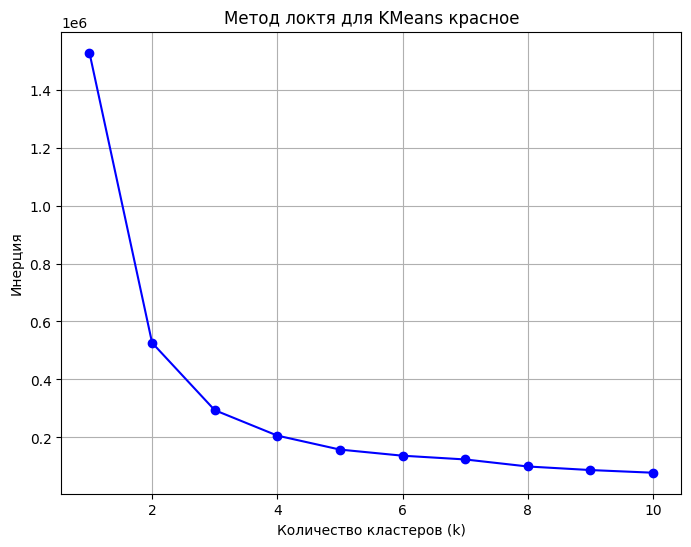

In [87]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Список для хранения значений инерции (сумма квадратов расстояний внутри кластеров)
inertia = []

# Пробуем различные значения k (от 1 до 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result_r)  # Используем результат PCA для кластеризации
    inertia.append(kmeans.inertia_)  # Сохраняем инерцию для каждого k

# Строим график метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Метод локтя для KMeans красное')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()


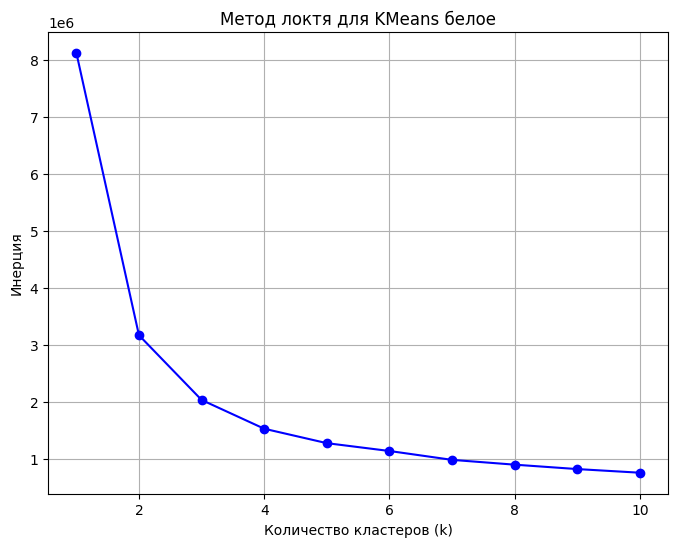

In [88]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Список для хранения значений инерции (сумма квадратов расстояний внутри кластеров)
inertia = []

# Пробуем различные значения k (от 1 до 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result_w)  # Используем результат PCA для кластеризации
    inertia.append(kmeans.inertia_)  # Сохраняем инерцию для каждого k

# Строим график метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Метод локтя для KMeans белое')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()


По обоим графикам, оптимальное количество кластров 2, максимум 3.

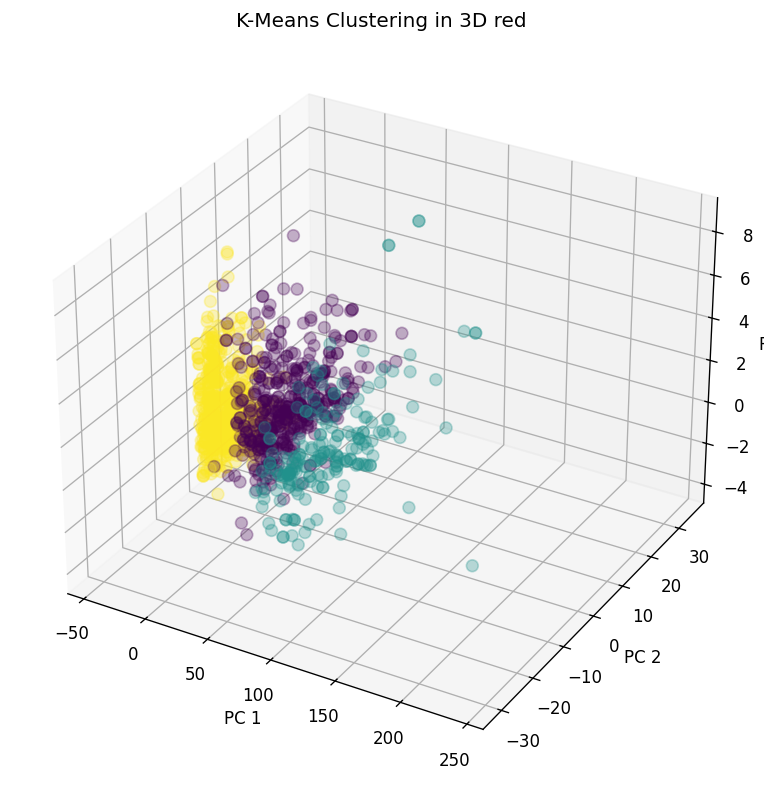

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Обучение K-Means с 3 кластерами (или оптимальным k из метода локтя)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_result_r)

# Предсказания: определяем, какой кластер принадлежит каждой точке
y_kmeans = kmeans.predict(pca_result_r)

# 3D визуализация
fig = plt.figure(figsize=(10, 8), dpi=120)
ax = fig.add_subplot(111, projection='3d')

# Отображаем точки, раскрашенные по кластерам
ax.scatter(pca_result_r[:, 0], pca_result_r[:, 1], pca_result_r[:, 2], c=y_kmeans, cmap='viridis', s=50, alpha=0.3)

# Метки для осей
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('K-Means Clustering in 3D red')

plt.show()




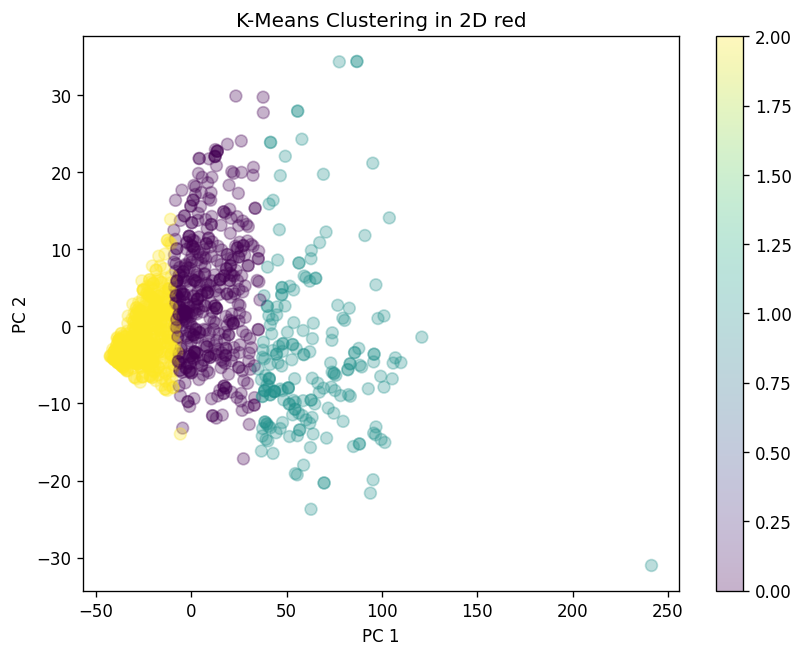

In [99]:
# 2D визуализация (используем только первые 2 компоненты PCA)
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

# Отображаем точки в 2D
scatter = ax.scatter(pca_result_r[:, 0], pca_result_r[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.3)

# Метки для осей
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('K-Means Clustering in 2D red')

# Добавляем цветовую шкалу
plt.colorbar(scatter)

plt.show()

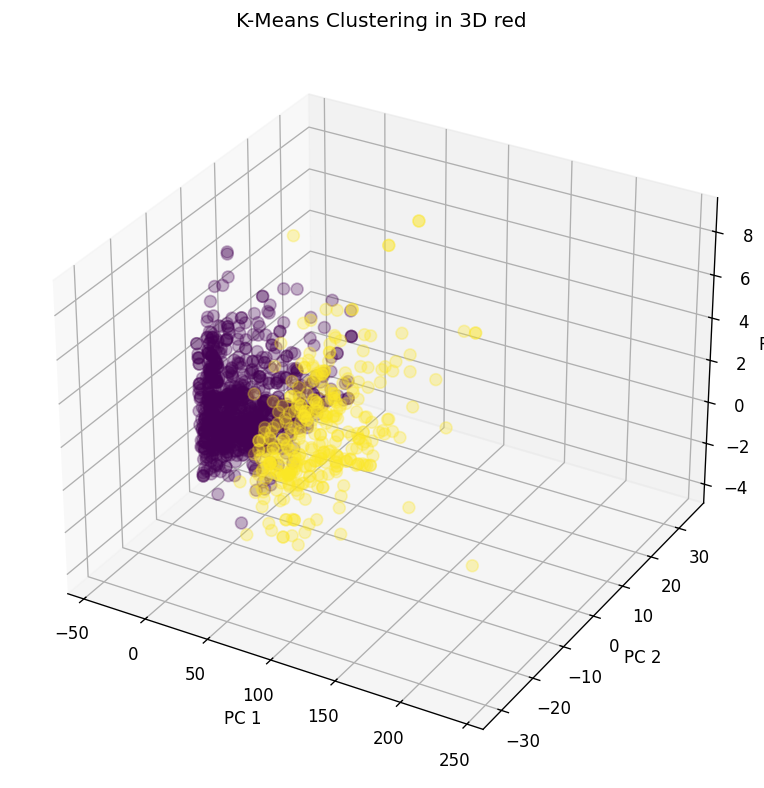

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Обучение K-Means с 3 кластерами (или оптимальным k из метода локтя)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_result_r)

# Предсказания: определяем, какой кластер принадлежит каждой точке
y_kmeans = kmeans.predict(pca_result_r)

# 3D визуализация
fig = plt.figure(figsize=(10, 8), dpi=120)
ax = fig.add_subplot(111, projection='3d')

# Отображаем точки, раскрашенные по кластерам
ax.scatter(pca_result_r[:, 0], pca_result_r[:, 1], pca_result_r[:, 2], c=y_kmeans, cmap='viridis', s=50, alpha=0.3)

# Метки для осей
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('K-Means Clustering in 3D red')

plt.show()




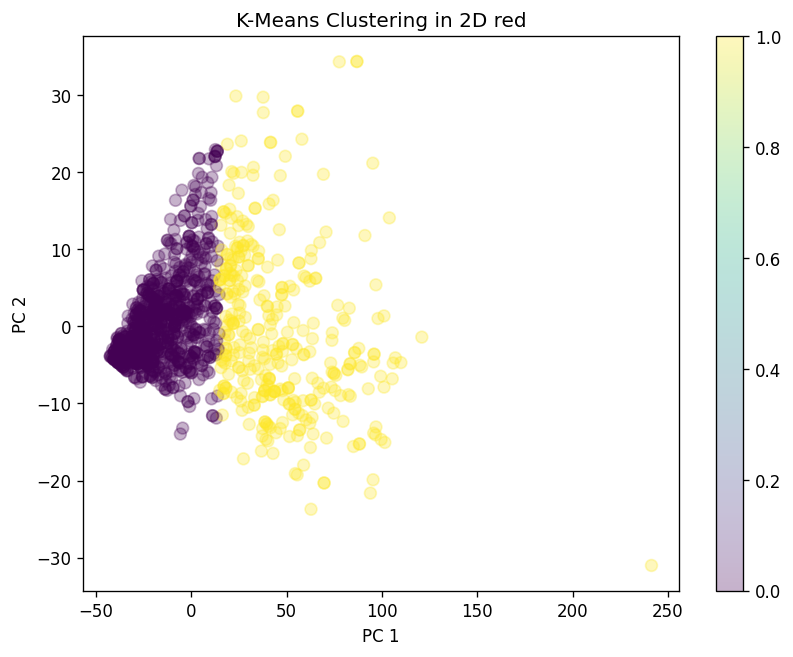

In [102]:
# 2D визуализация (используем только первые 2 компоненты PCA)
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

# Отображаем точки в 2D
scatter = ax.scatter(pca_result_r[:, 0], pca_result_r[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.3)

# Метки для осей
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('K-Means Clustering in 2D red')

# Добавляем цветовую шкалу
plt.colorbar(scatter)

plt.show()

## белое

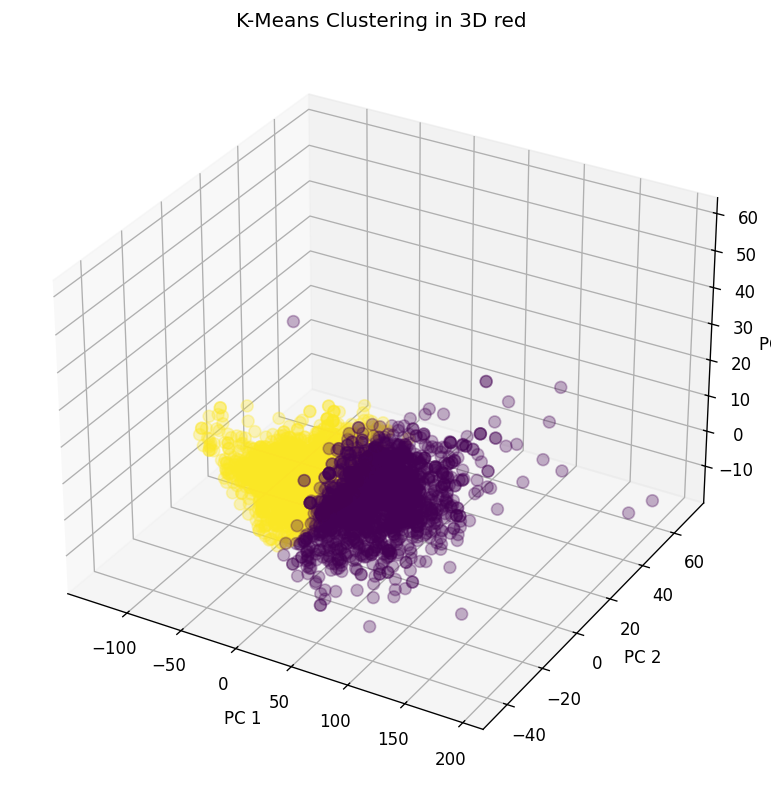

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Обучение K-Means с 3 кластерами (или оптимальным k из метода локтя)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_result_w)

# Предсказания: определяем, какой кластер принадлежит каждой точке
y_kmeans = kmeans.predict(pca_result_w)

# 3D визуализация
fig = plt.figure(figsize=(10, 8), dpi=120)
ax = fig.add_subplot(111, projection='3d')

# Отображаем точки, раскрашенные по кластерам
ax.scatter(pca_result_w[:, 0], pca_result_w[:, 1], pca_result_w[:, 2], c=y_kmeans, cmap='viridis', s=50, alpha=0.3)

# Метки для осей
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('K-Means Clustering in 3D red')

plt.show()




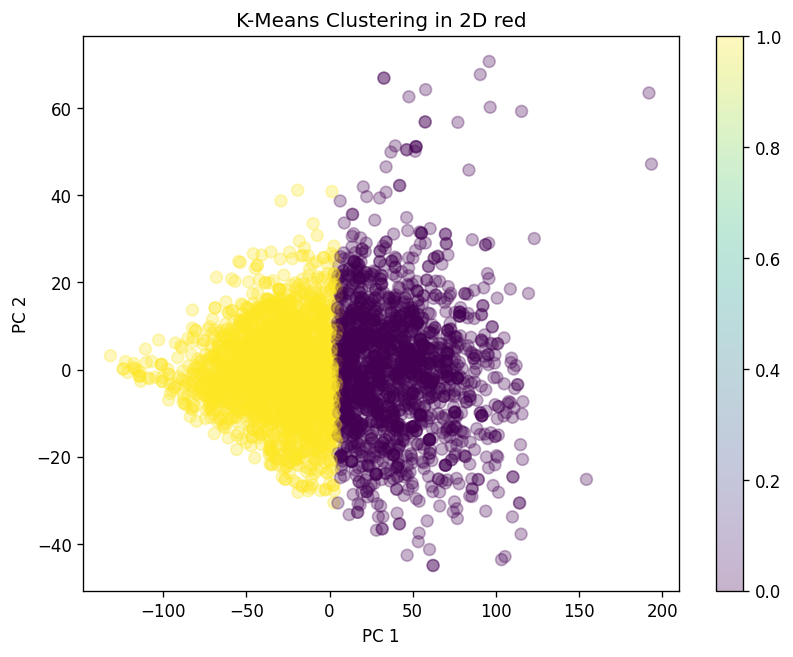

In [106]:
# 2D визуализация (используем только первые 2 компоненты PCA)
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

# Отображаем точки в 2D
scatter = ax.scatter(pca_result_w[:, 0], pca_result_w[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.3)

# Метки для осей
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('K-Means Clustering in 2D red')

# Добавляем цветовую шкалу
plt.colorbar(scatter)

plt.show()

# Outlayers

Найдено выбросов: 64


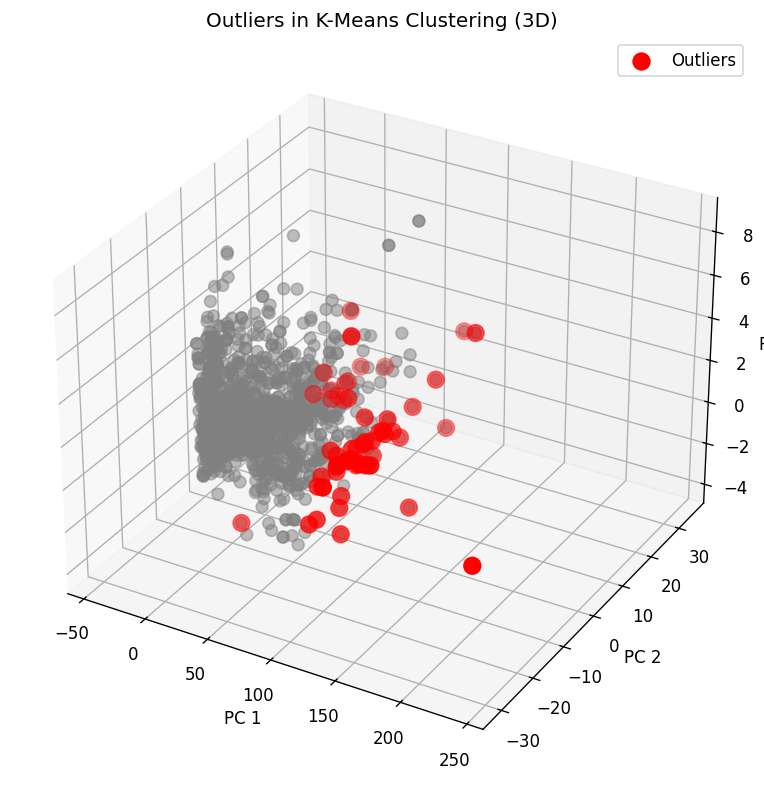

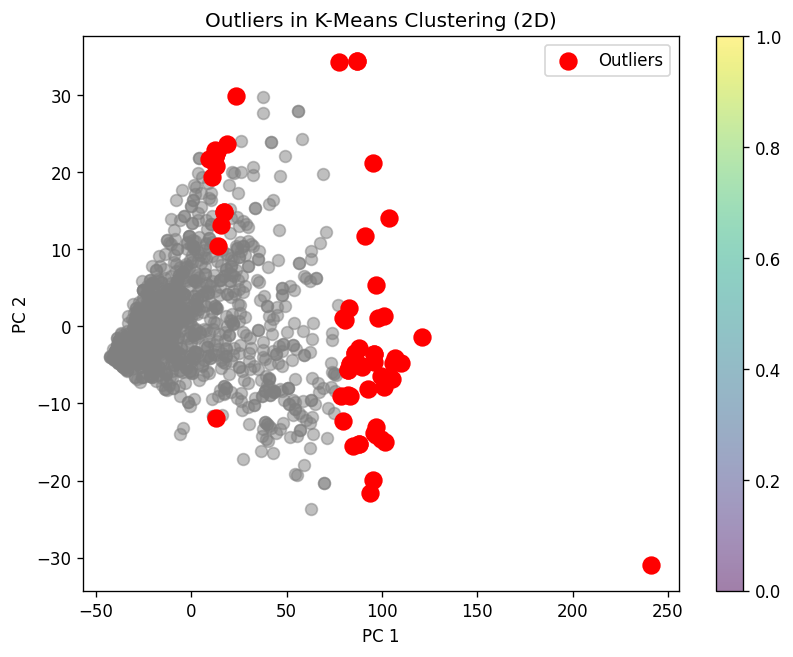

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_result_r)

# Получаем центры кластеров
centroids = kmeans.cluster_centers_

# Вычисляем расстояние каждой точки до соответствующего центроида
distances = cdist(pca_result_r, centroids, 'euclidean')

# Находим минимальное расстояние до центроида для каждой точки
min_distances = np.min(distances, axis=1)

# Определяем порог для выбросов (например, 95-й перцентиль или 2 стандартных отклонения)
threshold = np.percentile(min_distances, 95)  # можно использовать 95-й перцентиль
outliers = np.where(min_distances > threshold)[0]

# Отображаем выбросы
print(f"Найдено выбросов: {len(outliers)}")

# Визуализация выбросов
fig = plt.figure(figsize=(10, 8), dpi=120)
ax = fig.add_subplot(111, projection='3d')

# Отображаем все точки
ax.scatter(pca_result_r[:, 0], pca_result_r[:, 1], pca_result_r[:, 2], c='gray', alpha=0.5, s=50)

# Отображаем выбросы (в красном цвете)
ax.scatter(pca_result_r[outliers, 0], pca_result_r[outliers, 1], pca_result_r[outliers, 2], c='red', s=100, label='Outliers')

# Метки для осей
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('Outliers in K-Means Clustering (3D)')

plt.legend()
plt.show()

# 2D визуализация выбросов
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

# Отображаем все точки
scatter = ax.scatter(pca_result_r[:, 0], pca_result_r[:, 1], c='gray', alpha=0.5, s=50)

# Отображаем выбросы (в красном цвете)
ax.scatter(pca_result_r[outliers, 0], pca_result_r[outliers, 1], c='red', s=100, label='Outliers')

# Метки для осей
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Outliers in K-Means Clustering (2D)')

# Добавляем цветовую шкалу
plt.colorbar(scatter)
plt.legend()

plt.show()


Найдено выбросов: 79


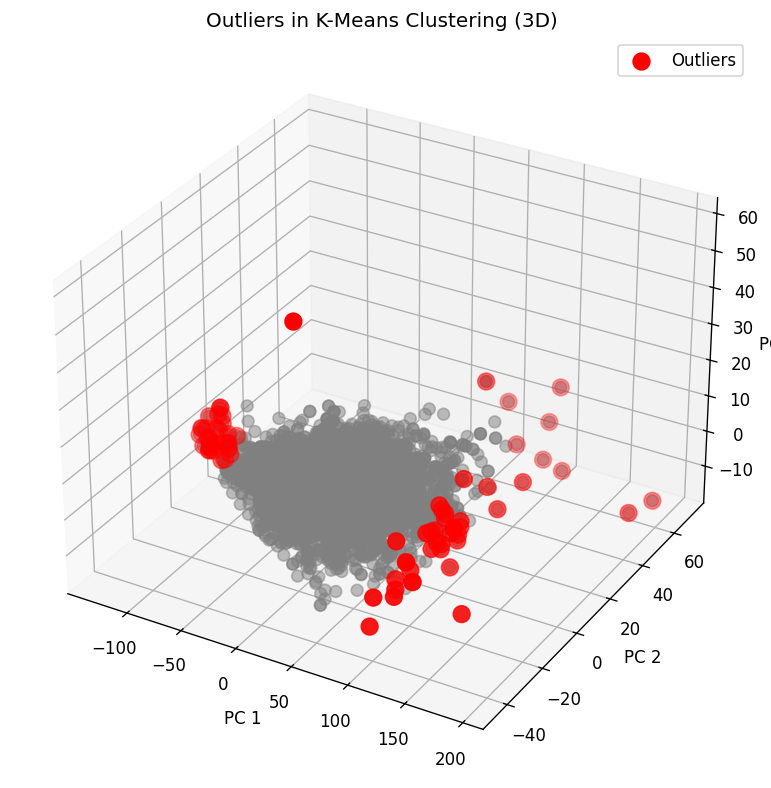

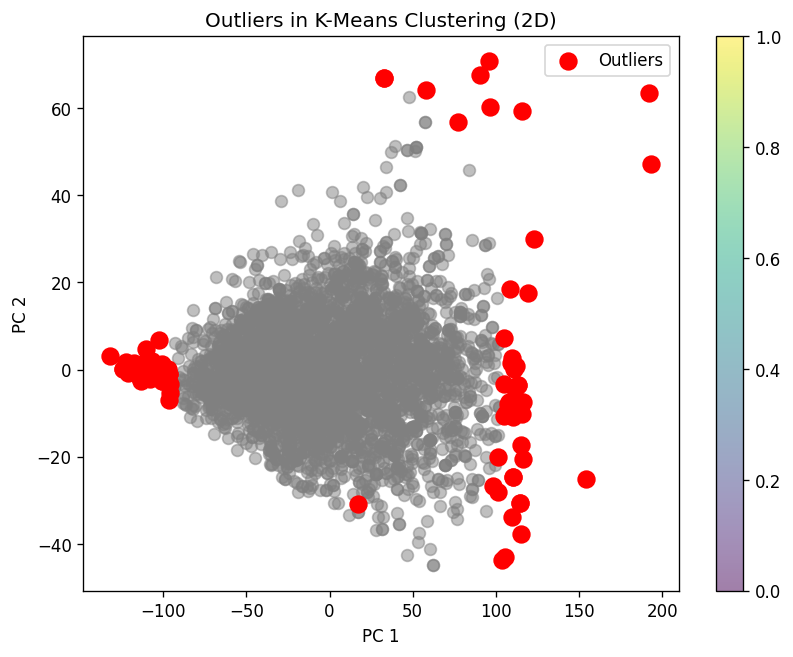

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_result_w)

# Получаем центры кластеров
centroids = kmeans.cluster_centers_

# Вычисляем расстояние каждой точки до соответствующего центроида
distances = cdist(pca_result_w, centroids, 'euclidean')

# Находим минимальное расстояние до центроида для каждой точки
min_distances = np.min(distances, axis=1)

# Определяем порог для выбросов (например, 95-й перцентиль или 2 стандартных отклонения)
threshold = np.percentile(min_distances, 98)  # можно использовать 95-й перцентиль
outliers = np.where(min_distances > threshold)[0]

# Отображаем выбросы
print(f"Найдено выбросов: {len(outliers)}")

# Визуализация выбросов
fig = plt.figure(figsize=(10, 8), dpi=120)
ax = fig.add_subplot(111, projection='3d')

# Отображаем все точки
ax.scatter(pca_result_w[:, 0], pca_result_w[:, 1], pca_result_w[:, 2], c='gray', alpha=0.5, s=50)

# Отображаем выбросы (в красном цвете)
ax.scatter(pca_result_w[outliers, 0], pca_result_w[outliers, 1], pca_result_w[outliers, 2], c='red', s=100, label='Outliers')

# Метки для осей
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('Outliers in K-Means Clustering (3D)')

plt.legend()
plt.show()

# 2D визуализация выбросов
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

# Отображаем все точки
scatter = ax.scatter(pca_result_w[:, 0], pca_result_w[:, 1], c='gray', alpha=0.5, s=50)

# Отображаем выбросы (в красном цвете)
ax.scatter(pca_result_w[outliers, 0], pca_result_w[outliers, 1], c='red', s=100, label='Outliers')

# Метки для осей
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Outliers in K-Means Clustering (2D)')

# Добавляем цветовую шкалу
plt.colorbar(scatter)
plt.legend()

plt.show()


# ML system design

Датасет будет полезен:


1.   В прогнозировании цены вина, его реальной стоимости, так как вино каждый год получается разное. Задача регрессии.
2.   Прогноз вкуса - экономия на дегустаторах. Мягкая классификация
3.   Рекомендательные системы онлайн-магазинов вина. Искать похожие по составу.
4.   Оптимизация производства - прогнозирование качества ещё не готового вина, чтобы можно было улучшить.





Преимущества:



1.   10-бальная шкала оценивания
2.   Деление на цвет вина



Недостатки:
1. Нет сортов, интересно было бы для каждого сорта качество прогнозировать.
2. Есть данные для готового вина, нет на этапах производства.
3. не описаны вкусовые качества
4. Нет подборки сочетаний с разными блюдами
5. нет года урожая
6. нет географического наименования